In [ ]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 !pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.7 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb


In [ ]:
data = pd.read_csv("/content/train-data.csv")
test = pd.read_csv("/content/test-data.csv")

In [ ]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

In [ ]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [ ]:
data.shape


(5975, 12)

In [ ]:
test.shape

(1223, 11)

In [ ]:
listtrain = data['Name']
listtest = test['Name']

In [ ]:
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Volkswagen CrossPolo 1.2 TDI', 'Fiat Avventura FIRE Dynamic', 'Skoda Octavia 2.0 TDI MT Style', 'Hyundai EON 1.0 Kappa Magna Plus', 'Honda Civic 2010-2013 1.8 S MT Inspire', 'Toyota Etios Liva VD', 'Tata Manza Club Class Safire90 LX', 'Fiat Linea Dynamic', 'Honda Amaze VX CVT i-VTEC', 'Hindustan Motors Contessa 2.0 DSL', 'Mahindra KUV 100 mFALCON D75 K2', 'Toyota Innova 2.5 GX 8 STR', 'Volkswagen Vento 1.5 TDI Highline Plus AT', 'Mercedes-Benz B Class B180 Sports', 'Renault Koleos 4X2 MT', 'Toyota Innova 2.0 V', 'Toyota Land Cruiser Prado VX L', 'Hyundai Xcent 1.2 CRDi SX', 'Fiat Linea Classic 1.3 Multijet', 'Maruti SX4 ZXI AT', 'Mahindra KUV 100 D75 K8 5Str', 'Maruti Ertiga VXI Petrol', 'Mercedes-Benz E-Class E240 V6 AT', 'Ford Freestyle Titanium Plus Diesel', 'Hyundai Accent GLX', 'Maruti Wagon R VXI AMT Opt', 'Mitsubishi Pajero Sport 4X2 AT', 'Chevrolet Enjoy 1.4 LTZ 8', 'Maruti Ciaz VDi Option SHVS', 'Hyundai i20 2015-2017 Magna Optional 1.4 CRDi', '

In [ ]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [ ]:
set(test['Cars']).issubset(set(data['Cars']))

False

In [ ]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z',
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [ ]:
listtrain = data['Cars']
listtest = test['Cars']

In [ ]:
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: set()


In [ ]:
listtrain = data['Cars']
listtest = test['Cars']


In [ ]:
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: set()


In [ ]:
data.head(3)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   
2                      Honda Jazz V  Chennai  2011              46000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   

   Price           Cars  
0   1.75   Maruti Wagon  
1  12.50  Hyundai Creta  
2   4.50     Honda Jazz

In [ ]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [ ]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [ ]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [ ]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Cars                  object
dtype: object

In [ ]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [ ]:
data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  5975.000000       5.975000e+03  5975.000000  5975.000000  5975.000000   
mean   2013.386778       5.867431e+04    18.179408  1621.606695   113.254882   
std       3.247238       9.155851e+04     4.521801   601.036987    53.415632   
min    1998.000000       1.710000e+02     0.000000   624.000000    34.200000   
25%    2012.000000       3.390800e+04    15.200000  1198.000000    77.000000   
50%    2014.000000       5.300000e+04    18.160000  1493.000000    98.600000   
75%    2016.000000       7.300000e+04    21.100000  1984.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  5975.000000  5975.000000  
mean      5.278828     9.501647  
std       0.808959    11.205736  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.650000  
75%       5.000000     9.950000  
max      10.000000   160.000000

In [ ]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

In [ ]:
data.head(3)

Cars Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti Wagon   Mumbai  2010              72000       CNG       Manual   
1  Hyundai Creta     Pune  2015              41000    Diesel       Manual   
2     Honda Jazz  Chennai  2011              46000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats  Price  
0      First    26.60   998.0   58.16    5.0   1.75  
1      First    19.67  1582.0  126.20    5.0  12.50  
2      First    18.20  1199.0   88.70    5.0   4.50

Skewness: 3.334741
Kurtosis: 17.073183


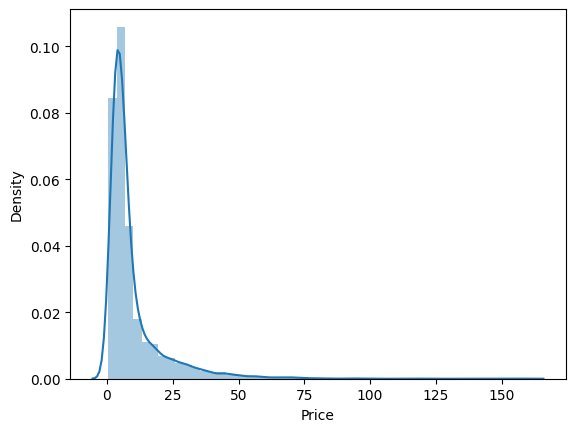

In [ ]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

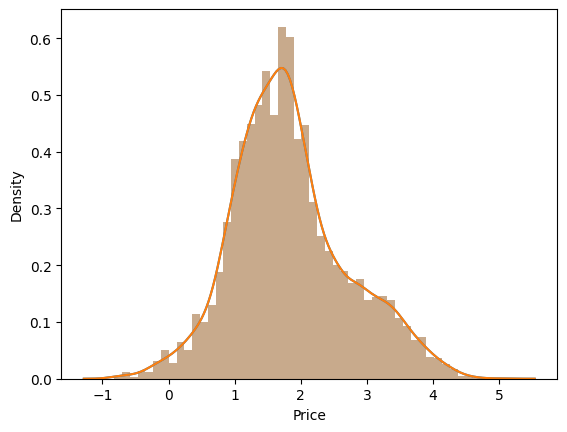

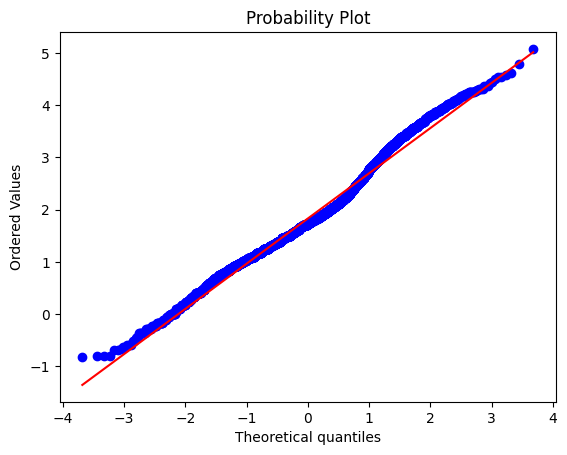

In [ ]:
data['Price'] = np.log(data['Price'])
sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

In [ ]:
print("Find most important features relative to Price-target")
corr = data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.755995
Engine               0.687712
Year                 0.503999
Seats                0.163818
Kilometers_Driven   -0.047187
Mileage             -0.265965
Name: Price, dtype: float64


In [ ]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type',
           values='Price', title='Price vs Fuel_type')

In [ ]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [ ]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

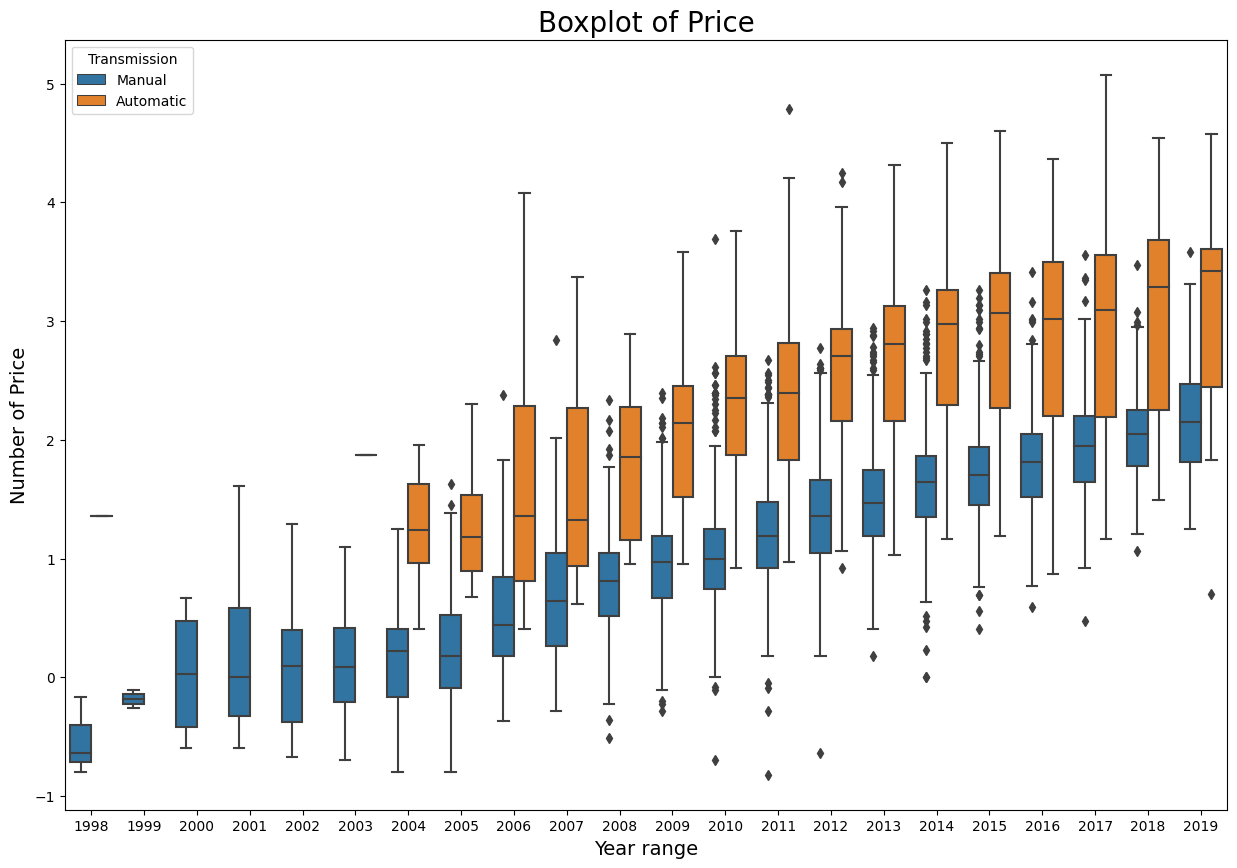

In [ ]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [ ]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")


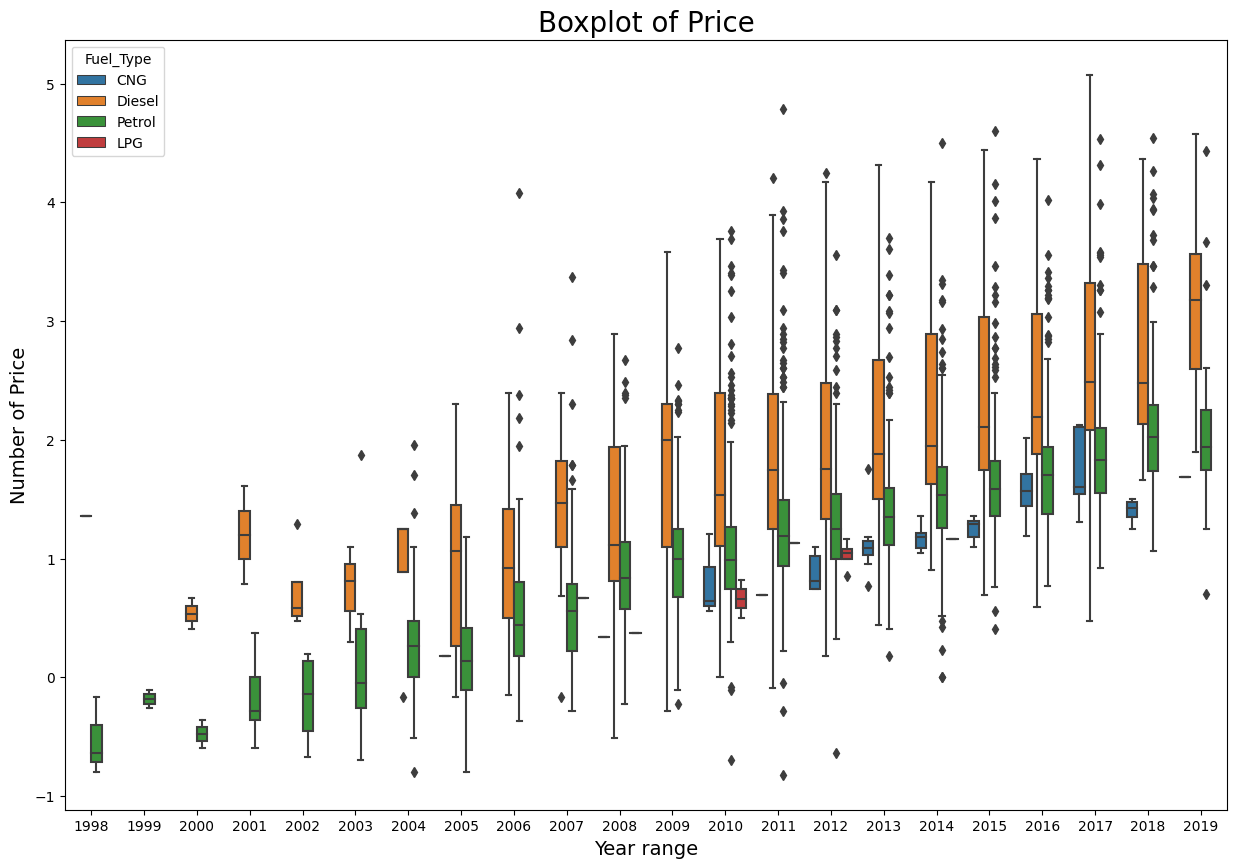

In [ ]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [ ]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [ ]:
px.violin(data, y='Price', x='Seats', color=None, box=True, points="all", hover_data=data.columns)

TRANING

In [ ]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict


cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)


df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [ ]:
df_test.head(2)

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   106         4          0             1           0  2014   
1   106         3          3             1           2  2013   

   Kilometers_Driven  Mileage  Engine  Power  Seats  
0              40929    32.26   998.0   58.2    4.0  
1              54493    24.70   796.0   47.3    5.0

In [ ]:
df_train.head(2)

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   124         9          0             1           0  2010   
1    65        10          1             1           0  2015   

   Kilometers_Driven  Mileage  Engine   Power  Seats     Price  
0              72000    26.60   998.0   58.16    5.0  0.559616  
1              41000    19.67  1582.0  126.20    5.0  2.525729

In [ ]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

In [ ]:
def Models(models):

    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10))
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)

    plt.legend(fontsize=15)
    plt.show()



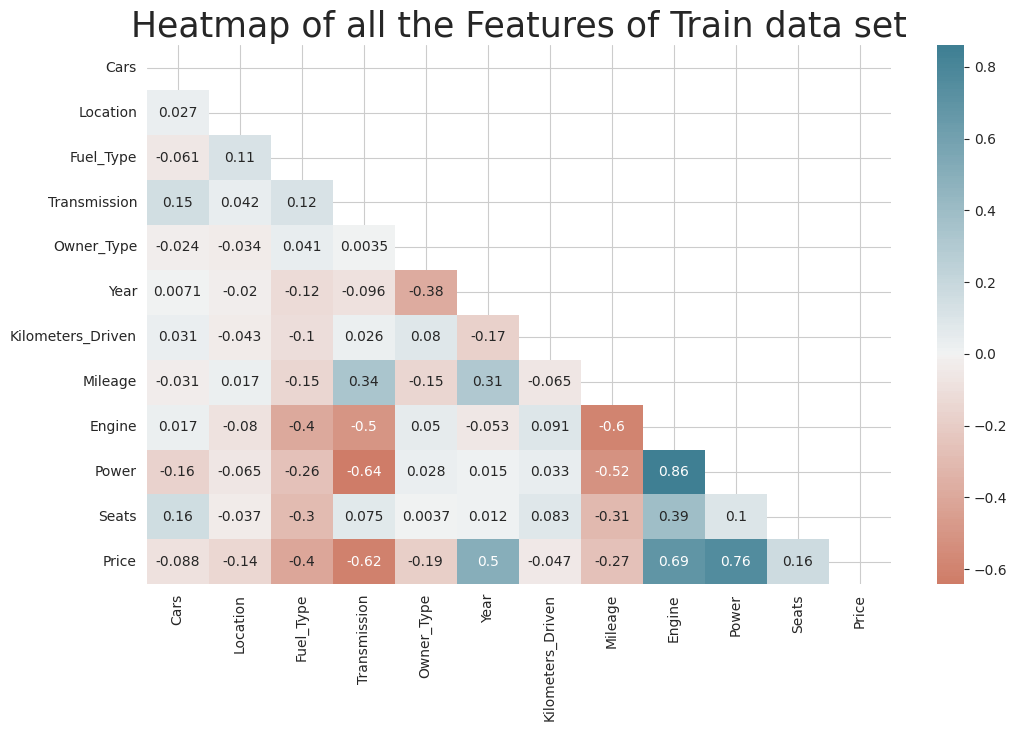

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [ ]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [ ]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)

    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [ ]:
Acc.sort_values(by='Accuracy on Testing set')

model  Root Mean Squared  Error  Accuracy on Traing set  \
3           MLPRegressor                236.703109                0.690236   
4      AdaBoostRegressor                146.552957                0.834899   
0  DecisionTreeRegressor                117.781144                0.999993   
2  RandomForestRegressor                 84.288525                0.991853   
5    ExtraTreesRegressor                 80.116046                0.999993   
1           XGBRegressor                 74.815814                0.994635   

   Accuracy on Testing set  
3                 0.533409  
4                 0.821138  
0                 0.884474  
2                 0.940835  
5                 0.946548  
1                 0.953386

		Error Table
Mean Absolute Error      :  55.96759139334785
Mean Squared  Error      :  6235.322488400938
Root Mean Squared  Error :  78.9640582062557
Accuracy on Traing set   :  0.992634733032549
Accuracy on Testing set  :  0.9480736707908918


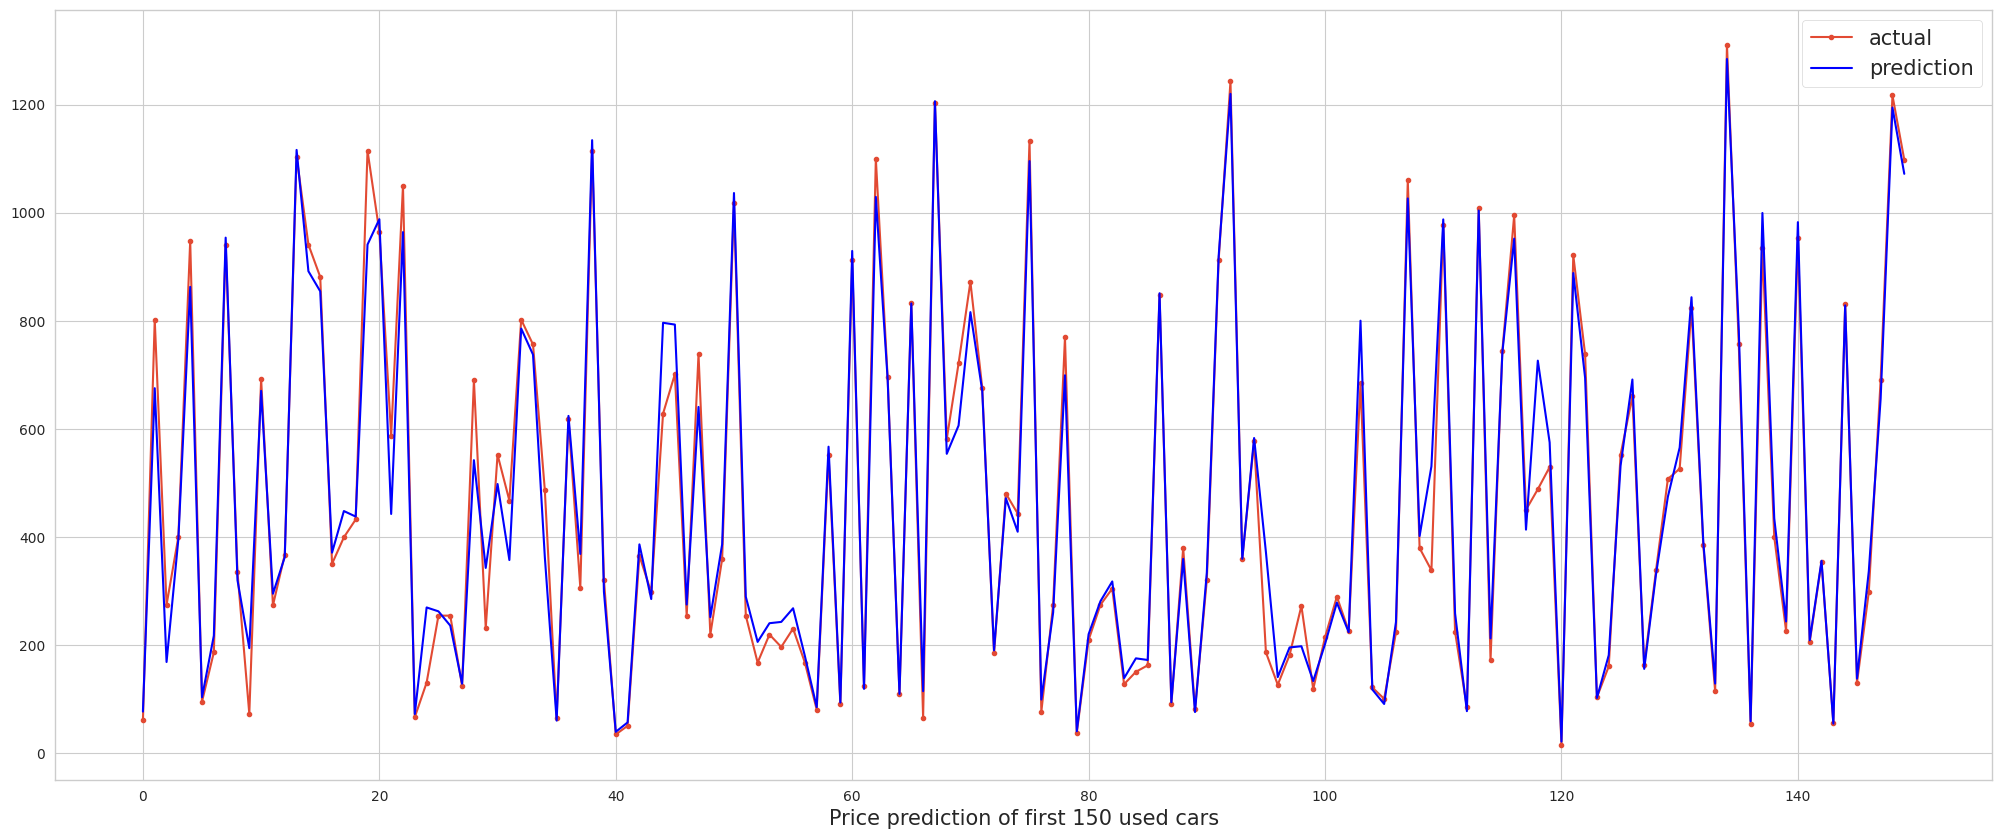

In [ ]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  47.05285207381301
Mean Squared  Error      :  4775.906080512007
Root Mean Squared  Error :  69.10793066292759
Accuracy on Traing set   :  0.9947381034525249
Accuracy on Testing set  :  0.9602273544199561


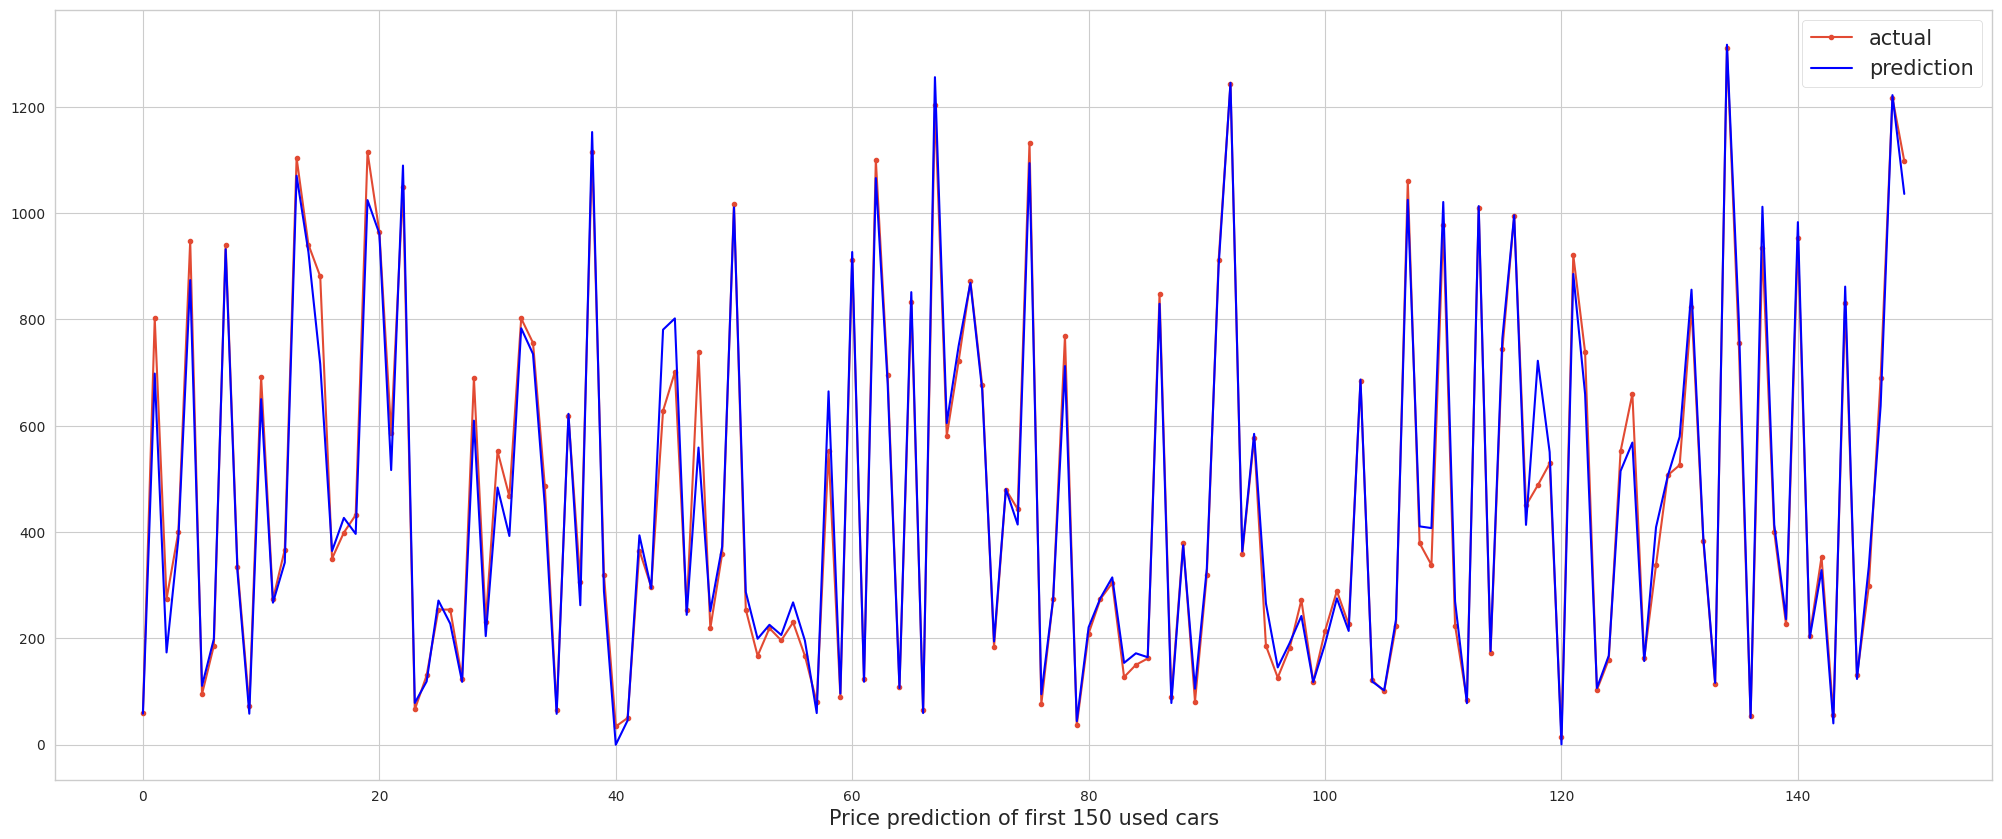

In [ ]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)

In [ ]:
y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 60))

Streaming output truncated to the last 5000 lines.
5006:	learn: 32.4534811	total: 11.4s	remaining: 11.4s
5007:	learn: 32.4487354	total: 11.4s	remaining: 11.4s
5008:	learn: 32.4461741	total: 11.4s	remaining: 11.4s
5009:	learn: 32.4427340	total: 11.4s	remaining: 11.4s
5010:	learn: 32.4401668	total: 11.4s	remaining: 11.4s
5011:	learn: 32.4355673	total: 11.4s	remaining: 11.4s
5012:	learn: 32.4299522	total: 11.4s	remaining: 11.4s
5013:	learn: 32.4275853	total: 11.4s	remaining: 11.4s
5014:	learn: 32.4261427	total: 11.4s	remaining: 11.4s
5015:	learn: 32.4235479	total: 11.4s	remaining: 11.4s
5016:	learn: 32.4212211	total: 11.4s	remaining: 11.4s
5017:	learn: 32.4206676	total: 11.4s	remaining: 11.4s
5018:	learn: 32.4180788	total: 11.4s	remaining: 11.4s
5019:	learn: 32.4131145	total: 11.4s	remaining: 11.4s
5020:	learn: 32.4097851	total: 11.4s	remaining: 11.3s
5021:	learn: 32.4081319	total: 11.4s	remaining: 11.3s
5022:	learn: 32.4059620	total: 11.4s	remaining: 11.3s
5023:	learn: 32.4045124	total: 

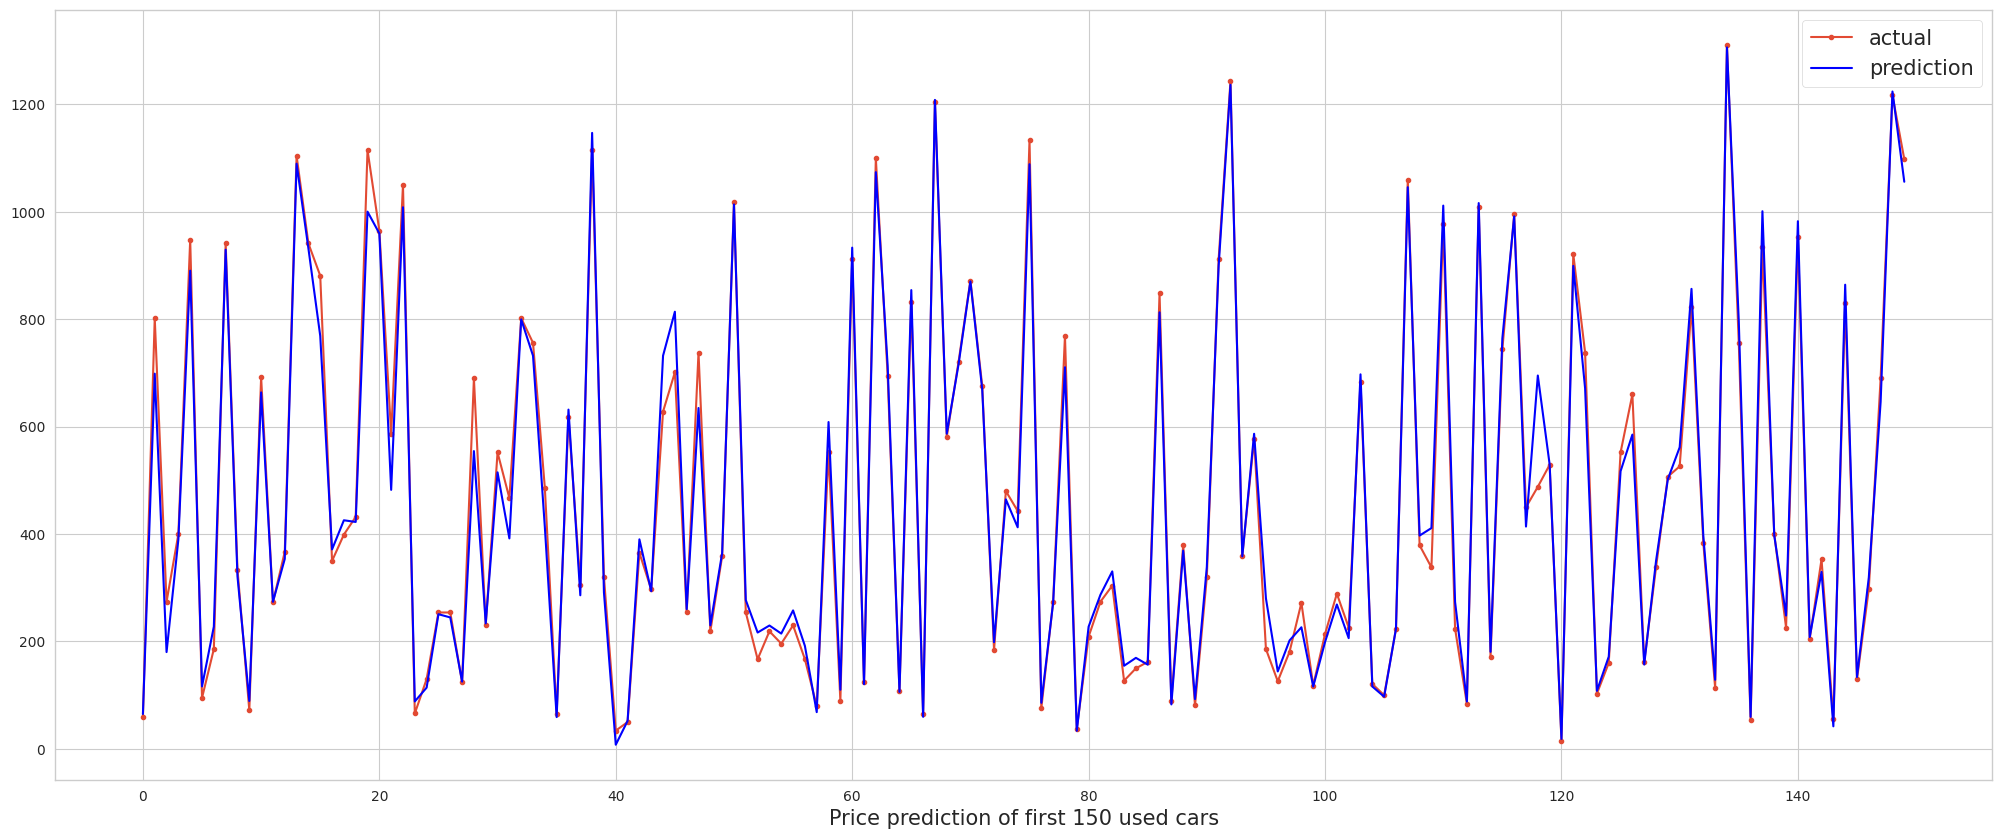

In [ ]:
Graph_prediction(150, y_actual, y_predicted)

In [ ]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

Prediction  Test Data   Abs error       AAD%
0   64.987943         60    4.987943   8.313238
1  698.647158        802  103.352842  12.886888
2  180.308369        274   93.691631  34.194026
3  390.045724        400    9.954276   2.488569
4  890.317846        948   57.682154   6.084615
5  116.382825         95   21.382825  22.508237
6  227.781281        186   41.781281  22.463054
7  929.365739        941   11.634261   1.236372
8  320.976607        334   13.023393   3.899220
9   89.281981         72   17.281981  24.002752

In [ ]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id':test.index,'Price':y_predicted})
submission.head(10)

Car_id        Price
0       0   229.220688
1       1   157.300412
2       2   933.110908
3       3   237.274792
4       4   273.766839
5       5   758.443125
6       6  1032.597871
7       7   122.656552
8       8   166.785100
9       9   751.605876

In [ ]:
filename = 'Prediction.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: Prediction.csv
